## Install Requirements

I used python 3.10 for this project. You can create a python env with python 3.10 in your terminal using
`conda create --name env python=3.10` followed by `conda activate env`.

After running this notebook, you can start by installing all the required dependencies using the following cell

In [ ]:
%pip install -r requirements.txt

## Data Exploration

In [2]:
import pandas as pd
df = pd.read_excel('data/Dataset Senior AI_ML Engineer PE.xlsx')
df

Received Email? (1=Yes)       Date  X1        X2        X3        X4
0                           0 2018-07-01   0 -0.897088  0.804294  0.707665
1                           0 2018-09-01   1 -0.328084 -0.332256 -0.340870
2                           0 2015-08-01   0  1.272140  2.243532  0.815581
3                           1 2017-07-01   1  0.290594 -1.161187 -0.881761
4                           0 2018-09-01   0 -0.307462  1.161276  1.597084
...                       ...        ...  ..       ...       ...       ...
5995                        1 2017-02-01   1 -0.650209 -1.861279 -1.565142
5996                        0 2015-11-01   0  0.000512  0.027472  0.669969
5997                        1 2017-04-01   1  0.620417 -0.508042 -0.973381
5998                        0 2017-12-01   0  0.503849  0.893938  0.519877
5999                        1 2017-04-01   1 -0.307048 -1.306521 -1.467989

[6000 rows x 6 columns]

#### Get statistics of the dataset

In [3]:
df.describe()

Received Email? (1=Yes)                        Date           X1  \
count              6000.000000                        6000  6000.000000   
mean                  0.155667  2016-12-07 07:59:02.400000     0.502167   
min                   0.000000         2015-01-01 00:00:00     0.000000   
25%                   0.000000         2015-12-01 00:00:00     0.000000   
50%                   0.000000         2016-12-01 00:00:00     1.000000   
75%                   0.000000         2017-12-01 00:00:00     1.000000   
max                   1.000000         2018-12-01 00:00:00     1.000000   
std                   0.362569                         NaN     0.500037   

                X2           X3           X4  
count  6000.000000  6000.000000  6000.000000  
mean     -0.003326     0.007374     0.015992  
min      -3.612620    -4.860280    -4.416066  
25%      -0.702663    -0.673058    -0.662022  
50%      -0.001634     0.015458     0.020163  
75%       0.685290     0.681624     0.681972  
max       3.896294     3.852129     3.641890  
std       1.004197     1.012626     1.013181

#### We have a data imbalance issue

In [4]:
df['Received Email? (1=Yes)'].value_counts()

Received Email? (1=Yes)
0    5066
1     934
Name: count, dtype: int64

Class imbalance where 15% of labels are positive while 85% of labels are negative

Some techniques we could try:
- SMOTE
- class balanced loss

#### What is the correlation between features?

In [5]:
df.corr()

Received Email? (1=Yes)      Date        X1  \
Received Email? (1=Yes)                 1.000000 -0.024201  0.342933   
Date                                   -0.024201  1.000000 -0.009736   
X1                                      0.342933 -0.009736  1.000000   
X2                                     -0.014307 -0.010991 -0.041341   
X3                                     -0.525441  0.008014 -0.608657   
X4                                     -0.517385  0.010169 -0.613084   

                               X2        X3        X4  
Received Email? (1=Yes) -0.014307 -0.525441 -0.517385  
Date                    -0.010991  0.008014  0.010169  
X1                      -0.041341 -0.608657 -0.613084  
X2                       1.000000  0.049200  0.050250  
X3                       0.049200  1.000000  0.901980  
X4                       0.050250  0.901980  1.000000

#### Let's look at the correlation graphically

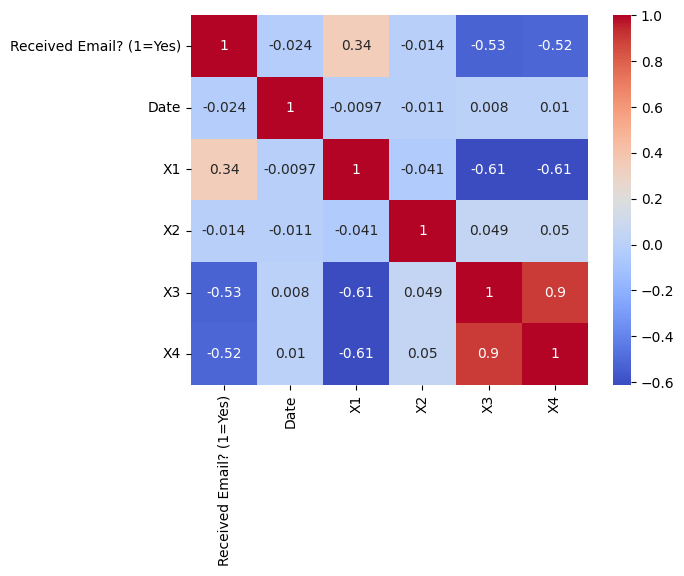

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

- Looking at the correlation, X2 is poorly correlated with the label. Such a feature would be less useful to algorithms like logistic regression, which rely on the linear combination of inputs. However, it might still be beneficial for tree-based models and neural networks, as these algorithms are adept at filtering out less useful features.
- Also, X3 and X4 are highly correlated. This can become redundant as the model tries to synthesize information from the features. However, given that there are only four features in our dataset, we can keep both X3 and X4.

#### Check for outliers

<Axes: >

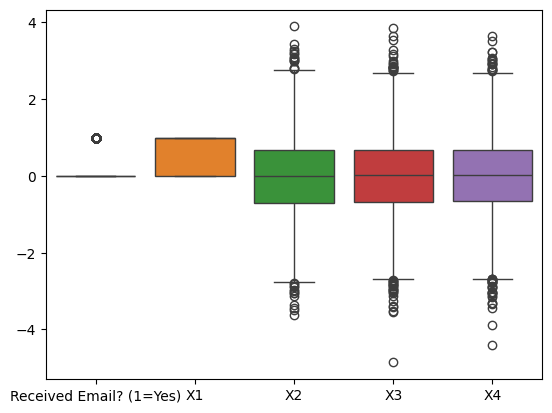

In [7]:
sns.boxplot(data=df)

#### Check Dates distribution

In [8]:
sorted(df['Date'].unique())

[Timestamp('2015-01-01 00:00:00'),
 Timestamp('2015-02-01 00:00:00'),
 Timestamp('2015-03-01 00:00:00'),
 Timestamp('2015-04-01 00:00:00'),
 Timestamp('2015-05-01 00:00:00'),
 Timestamp('2015-06-01 00:00:00'),
 Timestamp('2015-07-01 00:00:00'),
 Timestamp('2015-08-01 00:00:00'),
 Timestamp('2015-09-01 00:00:00'),
 Timestamp('2015-10-01 00:00:00'),
 Timestamp('2015-11-01 00:00:00'),
 Timestamp('2015-12-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-02-01 00:00:00'),
 Timestamp('2016-03-01 00:00:00'),
 Timestamp('2016-04-01 00:00:00'),
 Timestamp('2016-05-01 00:00:00'),
 Timestamp('2016-06-01 00:00:00'),
 Timestamp('2016-07-01 00:00:00'),
 Timestamp('2016-08-01 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2016-10-01 00:00:00'),
 Timestamp('2016-11-01 00:00:00'),
 Timestamp('2016-12-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2017-03-01 00:00:00'),
 Timestamp('2017-04-01 00:00:00'),
 Timestamp('2017-05-

Each date is on the first day of each month

In [9]:
sorted(dict(df['Date'].value_counts()).values())

[100,
 108,
 108,
 110,
 111,
 115,
 115,
 116,
 116,
 116,
 117,
 118,
 119,
 119,
 121,
 121,
 121,
 121,
 121,
 121,
 122,
 123,
 123,
 123,
 123,
 125,
 125,
 126,
 127,
 127,
 128,
 128,
 128,
 130,
 130,
 130,
 132,
 133,
 135,
 135,
 136,
 136,
 139,
 140,
 140,
 141,
 146,
 155]

The data is well distributed through time.

#### Looking at duplicates

In [10]:
df[df.duplicated()]

Received Email? (1=Yes)       Date  X1        X2        X3        X4
22                          0 2018-07-01   0 -0.897088  0.804294  0.707665
44                          0 2018-07-01   0 -0.897088  0.804294  0.707665
66                          0 2018-07-01   0 -0.897088  0.804294  0.707665
88                          0 2018-07-01   0 -0.897088  0.804294  0.707665
1001                        0 2018-07-01   0 -0.897088  0.804294  0.707665
1002                        0 2018-07-01   0 -0.897088  0.804294  0.707665
1003                        0 2018-07-01   0 -0.897088  0.804294  0.707665
1004                        0 2018-07-01   0 -0.897088  0.804294  0.707665
2001                        0 2018-07-01   0 -0.897088  0.804294  0.707665
3001                        0 2018-07-01   0 -0.897088  0.804294  0.707665

There are duplicates that we will need to clean

In [11]:
df['X1'].value_counts()

X1
1    3013
0    2987
Name: count, dtype: int64

In [12]:
df['X2'].value_counts()

X2
-0.897088    11
 0.167767     1
 2.579635     1
-0.448749     1
-1.448938     1
             ..
-0.713061     1
 0.305317     1
 0.020650     1
 0.645767     1
-0.307048     1
Name: count, Length: 5990, dtype: int64

In [13]:
df['X3'].value_counts()

X3
 0.804294    11
 1.781295     1
 1.437354     1
 0.210463     1
-0.381873     1
             ..
-0.110744     1
-0.104619     1
-2.095296     1
-0.719098     1
-1.306521     1
Name: count, Length: 5990, dtype: int64

In [14]:
df['X4'].value_counts()

X4
 0.707665    11
 1.514111     1
 1.084306     1
 0.225929     1
-0.660916     1
             ..
 0.137310     1
 0.066023     1
-0.953265     1
-0.550394     1
-1.467989     1
Name: count, Length: 5990, dtype: int64

## Data Preprocessing

### Data Cleaning

#### Check for missing data

In [15]:
df.isna().sum()

Received Email? (1=Yes)    0
Date                       0
X1                         0
X2                         0
X3                         0
X4                         0
dtype: int64

#### Make sure we have consistent data types

In [16]:
print(df.dtypes)

Received Email? (1=Yes)             int64
Date                       datetime64[ns]
X1                                  int64
X2                                float64
X3                                float64
X4                                float64
dtype: object


Data inconsistency can be determined with the column type being "object"

#### There were a few duplicates in the dataset. We can remove them.

In [17]:
df = df.drop_duplicates().copy()

In [18]:
len(df)

5990

### Feature Engineering

In [19]:
# build cross features
df['X1*X2'] = df['X1'] * df['X2']
df['X1*X3'] = df['X1'] * df['X3']
df['X1*X4'] = df['X1'] * df['X4']
df['X2*X3'] = df['X2'] * df['X3']
df['X2*X4'] = df['X2'] * df['X4']
df['X3*X4'] = df['X3'] * df['X4']
df

Received Email? (1=Yes)       Date  X1        X2        X3        X4  \
0                           0 2018-07-01   0 -0.897088  0.804294  0.707665   
1                           0 2018-09-01   1 -0.328084 -0.332256 -0.340870   
2                           0 2015-08-01   0  1.272140  2.243532  0.815581   
3                           1 2017-07-01   1  0.290594 -1.161187 -0.881761   
4                           0 2018-09-01   0 -0.307462  1.161276  1.597084   
...                       ...        ...  ..       ...       ...       ...   
5995                        1 2017-02-01   1 -0.650209 -1.861279 -1.565142   
5996                        0 2015-11-01   0  0.000512  0.027472  0.669969   
5997                        1 2017-04-01   1  0.620417 -0.508042 -0.973381   
5998                        0 2017-12-01   0  0.503849  0.893938  0.519877   
5999                        1 2017-04-01   1 -0.307048 -1.306521 -1.467989   

         X1*X2     X1*X3     X1*X4     X2*X3     X2*X4     X3*X4  
0    -0.000000  0.000000  0.000000 -0.721523 -0.634838  0.569171  
1    -0.328084 -0.332256 -0.340870  0.109008  0.111834  0.113256  
2     0.000000  0.000000  0.000000  2.854087  1.037534  1.829783  
3     0.290594 -1.161187 -0.881761 -0.337434 -0.256234  1.023889  
4    -0.000000  0.000000  0.000000 -0.357049 -0.491043  1.854656  
...        ...       ...       ...       ...       ...       ...  
5995 -0.650209 -1.861279 -1.565142  1.210220  1.017670  2.913166  
5996  0.000000  0.000000  0.000000  0.000014  0.000343  0.018406  
5997  0.620417 -0.508042 -0.973381 -0.315198 -0.603902  0.494518  
5998  0.000000  0.000000  0.000000  0.450410  0.261939  0.464737  
5999 -0.307048 -1.306521 -1.467989  0.401164  0.450743  1.917959  

[5990 rows x 12 columns]

In [20]:
# Figure out if a date is a weekday or weekend
df['Date'] = pd.to_datetime(df['Date'])
df['is_weekend'] = df['Date'].dt.day_name().apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

In [21]:
df

Received Email? (1=Yes)       Date  X1        X2        X3        X4  \
0                           0 2018-07-01   0 -0.897088  0.804294  0.707665   
1                           0 2018-09-01   1 -0.328084 -0.332256 -0.340870   
2                           0 2015-08-01   0  1.272140  2.243532  0.815581   
3                           1 2017-07-01   1  0.290594 -1.161187 -0.881761   
4                           0 2018-09-01   0 -0.307462  1.161276  1.597084   
...                       ...        ...  ..       ...       ...       ...   
5995                        1 2017-02-01   1 -0.650209 -1.861279 -1.565142   
5996                        0 2015-11-01   0  0.000512  0.027472  0.669969   
5997                        1 2017-04-01   1  0.620417 -0.508042 -0.973381   
5998                        0 2017-12-01   0  0.503849  0.893938  0.519877   
5999                        1 2017-04-01   1 -0.307048 -1.306521 -1.467989   

         X1*X2     X1*X3     X1*X4     X2*X3     X2*X4     X3*X4  is_weekend  
0    -0.000000  0.000000  0.000000 -0.721523 -0.634838  0.569171           1  
1    -0.328084 -0.332256 -0.340870  0.109008  0.111834  0.113256           1  
2     0.000000  0.000000  0.000000  2.854087  1.037534  1.829783           1  
3     0.290594 -1.161187 -0.881761 -0.337434 -0.256234  1.023889           1  
4    -0.000000  0.000000  0.000000 -0.357049 -0.491043  1.854656           1  
...        ...       ...       ...       ...       ...       ...         ...  
5995 -0.650209 -1.861279 -1.565142  1.210220  1.017670  2.913166           0  
5996  0.000000  0.000000  0.000000  0.000014  0.000343  0.018406           1  
5997  0.620417 -0.508042 -0.973381 -0.315198 -0.603902  0.494518           1  
5998  0.000000  0.000000  0.000000  0.450410  0.261939  0.464737           0  
5999 -0.307048 -1.306521 -1.467989  0.401164  0.450743  1.917959           1  

[5990 rows x 13 columns]

In [22]:
df.corr()

Received Email? (1=Yes)      Date        X1  \
Received Email? (1=Yes)                 1.000000 -0.023274  0.342554   
Date                                   -0.023274  1.000000 -0.007495   
X1                                      0.342554 -0.007495  1.000000   
X2                                     -0.014957 -0.009008 -0.042898   
X3                                     -0.525229  0.006256 -0.608163   
X4                                     -0.517176  0.008650 -0.612693   
X1*X2                                  -0.017302 -0.008225 -0.031306   
X1*X3                                  -0.583320 -0.001557 -0.466507   
X1*X4                                  -0.570880  0.003081 -0.465408   
X2*X3                                   0.015233  0.014412  0.016748   
X2*X4                                   0.012162  0.019400  0.008983   
X3*X4                                   0.305863  0.013143 -0.005177   
is_weekend                             -0.011541  0.022858 -0.025982   

                               X2        X3        X4     X1*X2     X1*X3  \
Received Email? (1=Yes) -0.014957 -0.525229 -0.517176 -0.017302 -0.583320   
Date                    -0.009008  0.006256  0.008650 -0.008225 -0.001557   
X1                      -0.042898 -0.608163 -0.612693 -0.031306 -0.466507   
X2                       1.000000  0.050429  0.051319  0.710824  0.051948   
X3                       0.050429  1.000000  0.901900  0.047887  0.785614   
X4                       0.051319  0.901900  1.000000  0.043111  0.708572   
X1*X2                    0.710824  0.047887  0.043111  1.000000  0.059573   
X1*X3                    0.051948  0.785614  0.708572  0.059573  1.000000   
X1*X4                    0.046579  0.707752  0.785390  0.052046  0.879157   
X2*X3                    0.011934 -0.026929 -0.022770 -0.424207 -0.055774   
X2*X4                    0.013183 -0.022732 -0.020412 -0.426065 -0.053050   
X3*X4                   -0.015130 -0.008662 -0.007785 -0.030040 -0.474268   
is_weekend               0.014158  0.019831  0.029007  0.005849  0.005110   

                            X1*X4     X2*X3     X2*X4     X3*X4  is_weekend  
Received Email? (1=Yes) -0.570880  0.015233  0.012162  0.305863   -0.011541  
Date                     0.003081  0.014412  0.019400  0.013143    0.022858  
X1                      -0.465408  0.016748  0.008983 -0.005177   -0.025982  
X2                       0.046579  0.011934  0.013183 -0.015130    0.014158  
X3                       0.707752 -0.026929 -0.022732 -0.008662    0.019831  
X4                       0.785390 -0.022770 -0.020412 -0.007785    0.029007  
X1*X2                    0.052046 -0.424207 -0.426065 -0.030040    0.005849  
X1*X3                    0.879157 -0.055774 -0.053050 -0.474268    0.005110  
X1*X4                    1.000000 -0.052956 -0.055748 -0.472495    0.007298  
X2*X3                   -0.052956  1.000000  0.906648  0.060915    0.002176  
X2*X4                   -0.055748  0.906648  1.000000  0.058404    0.002016  
X3*X4                   -0.472495  0.060915  0.058404  1.000000    0.003831  
is_weekend               0.007298  0.002176  0.002016  0.003831    1.000000

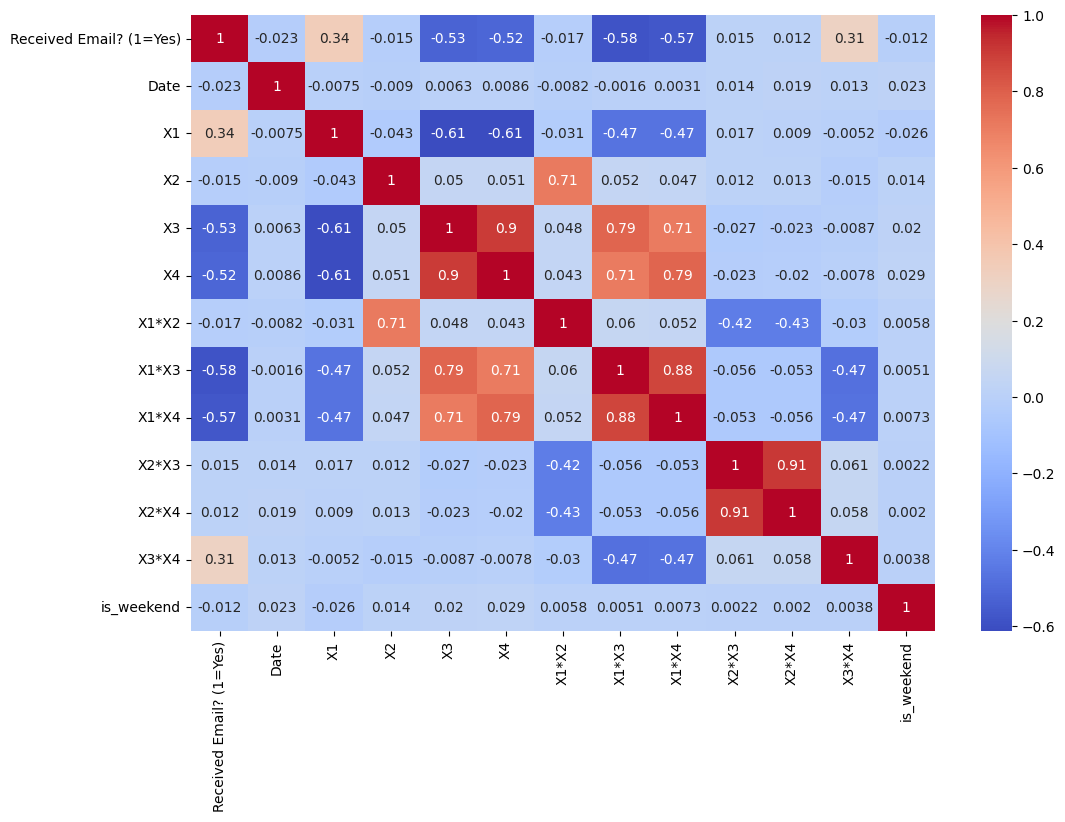

In [23]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Based on the results above, for the additional features, let's keep only the X1*X3 cross features as it is the most correlated with the output label.

In [24]:
# Drop cross features with poor correlation with the output label
df = df.drop(columns=['X1*X2', 'X1*X4', 'X2*X3', 'X2*X4', 'X3*X4', 'is_weekend'])

Split Training, Validation and Test set

In [25]:
df = df.sort_values(by='Date').reset_index(drop=True)

In [26]:
# Split the data into train, validation, and test using the sorted timestamps
train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15

n = len(df)
train_end = int(train_ratio * n)
val_end = int((train_ratio + val_ratio) * n)

train_data = df.iloc[:train_end]
val_data = df.iloc[train_end:val_end]
test_data = df.iloc[val_end:]

In [27]:
y_column = 'Received Email? (1=Yes)'

X_train = train_data.drop(columns=[y_column, 'Date'])
y_train = train_data[y_column]

X_val = val_data.drop(columns=[y_column, 'Date'])
y_val = val_data[y_column]

X_test = test_data.drop(columns=[y_column, 'Date'])
y_test = test_data[y_column]

In [28]:
# Normalize the features after splitting the data to avoid data leakage
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler() # alternatively, we can use StandardScaler
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val) # use the same scaler as train
X_test_normalized = scaler.transform(X_test) # use the same scaler as train

### Feature Selection

Chi-squared Test requires features to be non-negative

In [29]:
# Figure out the best features to use
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_train_normalized, y_train)
dfscores = pd.DataFrame(fit.scores_)
X_columns = train_data.drop(columns=[y_column, 'Date']).columns
dfcolumns = pd.DataFrame(X_columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']

print(featureScores.nlargest(10, 'Score'))

   Specs       Score
0     X1  241.783648
3     X4   33.480897
2     X3   28.194024
4  X1*X3   20.104572
1     X2    0.025042


### Data Augmentation

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

df_resampled = pd.DataFrame(X_resampled, columns=X_columns)
df_resampled['label'] = y_resampled
df_resampled

X1        X2        X3        X4     X1*X3  label
0      0  0.677904  0.626854  0.267019  0.000000      0
1      1  1.118519  1.183486  1.062141  1.183486      0
2      1 -0.354458  1.000700  1.254997  1.000700      0
3      1  1.571629 -1.348915 -0.794222 -1.348915      0
4      1  1.466118 -1.452262 -0.705703 -1.452262      0
...   ..       ...       ...       ...       ...    ...
7047   1  1.227045 -0.959696 -0.146585 -0.959696      1
7048   1  0.399532 -0.761781 -0.641243 -0.761781      1
7049   1  1.172278 -1.188750 -1.165941 -1.188750      1
7050   1  0.921514 -0.185145 -0.371793 -0.185145      1
7051   1 -0.421976 -1.713425 -2.029030 -1.713425      1

[7052 rows x 6 columns]

In [50]:
df_resampled['label'].value_counts()

label
0    3526
1    3526
Name: count, dtype: int64

Post experimentation remarks: The dataset oversampled using SMOTE is to demonstrate one way to reduce data imbalance issues.
Depending on the use case of this model (prioritize positive class or the negative class) we may/may not decide to use SMOTE

## Model Selection and Training

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [32]:
def perform_grid_search(model, param_grid, X_train, y_train, X_val, y_val):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    val_pred = best_model.predict(X_val)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Validation Accuracy:", accuracy_score(y_val, val_pred))
    print("Validation Confusion Matrix:\n", confusion_matrix(y_val, val_pred))
    print("Validation Classification Report:\n", classification_report(y_val, val_pred))

In [33]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l1', 'l2'],      # Regularization penalty
    'solver': ['liblinear']       # Solver to use
}

print("Logistic Regression")
perform_grid_search(LogisticRegression(), param_grid, X_train, y_train, X_val, y_val)

Logistic Regression
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy: 0.876391982182628
Validation Confusion Matrix:
 [[721  34]
 [ 77  66]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       755
           1       0.66      0.46      0.54       143

    accuracy                           0.88       898
   macro avg       0.78      0.71      0.74       898
weighted avg       0.86      0.88      0.87       898



In [34]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l1', 'l2'],      # Regularization penalty
    'solver': ['liblinear']       # Solver to use
}

print("Logistic Regression with class balanced loss")
perform_grid_search(LogisticRegression(class_weight='balanced'), param_grid, X_train, y_train, X_val, y_val)

Logistic Regression with class balanced loss
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy: 0.8273942093541202
Validation Confusion Matrix:
 [[622 133]
 [ 22 121]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       755
           1       0.48      0.85      0.61       143

    accuracy                           0.83       898
   macro avg       0.72      0.83      0.75       898
weighted avg       0.89      0.83      0.84       898



In [35]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

print("K-Nearest Neighbors")
perform_grid_search(KNeighborsClassifier(), param_grid, X_train, y_train, X_val, y_val)

K-Nearest Neighbors
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Validation Accuracy: 0.8663697104677061
Validation Confusion Matrix:
 [[711  44]
 [ 76  67]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       755
           1       0.60      0.47      0.53       143

    accuracy                           0.87       898
   macro avg       0.75      0.71      0.72       898
weighted avg       0.86      0.87      0.86       898



In [36]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

print("Random Forest")
perform_grid_search(RandomForestClassifier(), param_grid, X_train, y_train, X_val, y_val)

Random Forest
Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 50}
Validation Accuracy: 0.8741648106904232
Validation Confusion Matrix:
 [[714  41]
 [ 72  71]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       755
           1       0.63      0.50      0.56       143

    accuracy                           0.87       898
   macro avg       0.77      0.72      0.74       898
weighted avg       0.86      0.87      0.87       898



In [37]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

print("Support Vector Machines")
perform_grid_search(SVC(), param_grid, X_train, y_train, X_val, y_val)

Support Vector Machines
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Validation Accuracy: 0.8797327394209354
Validation Confusion Matrix:
 [[725  30]
 [ 78  65]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       755
           1       0.68      0.45      0.55       143

    accuracy                           0.88       898
   macro avg       0.79      0.71      0.74       898
weighted avg       0.87      0.88      0.87       898



In [38]:
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

print("XGBoost")
perform_grid_search(XGBClassifier(), param_grid, X_train, y_train, X_val, y_val)

XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Validation Accuracy: 0.8775055679287305
Validation Confusion Matrix:
 [[719  36]
 [ 74  69]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       755
           1       0.66      0.48      0.56       143

    accuracy                           0.88       898
   macro avg       0.78      0.72      0.74       898
weighted avg       0.87      0.88      0.87       898



In [39]:
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

print("Neural Network")
perform_grid_search(MLPClassifier(), param_grid, X_train, y_train, X_val, y_val)

Neural Network


/Users/akokoroko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/akokoroko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/akokoroko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/akokoroko/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters: {'alpha': 0.05, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}
Validation Accuracy: 0.8797327394209354
Validation Confusion Matrix:
 [[721  34]
 [ 74  69]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       755
           1       0.67      0.48      0.56       143

    accuracy                           0.88       898
   macro avg       0.79      0.72      0.75       898
weighted avg       0.87      0.88      0.87       898



### Performance on Test Set

In [40]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, test_pred))
print("Test Classification Report:\n", classification_report(y_test, test_pred))


Test Accuracy: 0.8809788654060067
Test Confusion Matrix:
 [[731  44]
 [ 63  61]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       775
           1       0.58      0.49      0.53       124

    accuracy                           0.88       899
   macro avg       0.75      0.72      0.73       899
weighted avg       0.87      0.88      0.88       899



### Feature Importance

Using built-in tree-based feature importance

  Feature  Importance
2      X3    0.650605
3      X4    0.272650
4   X1*X3    0.047961
1      X2    0.028784
0      X1    0.000000


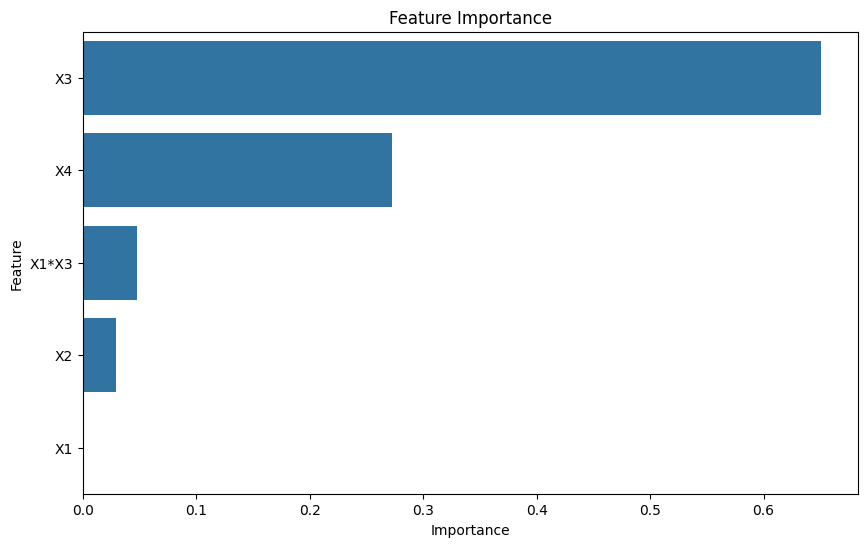

In [41]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

Using SHAP feature importance

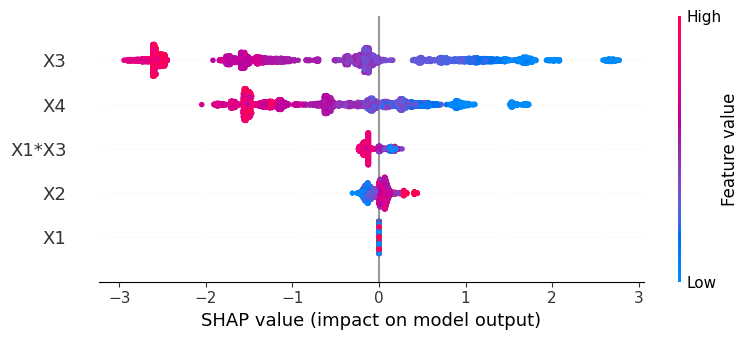

In [42]:
import shap
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

Using LIME feature importance for specific samples of the test set

/Users/akokoroko/.local/lib/python3.10/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/akokoroko/.local/lib/python3.10/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/akokoroko/.local/lib/python3.10/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). T

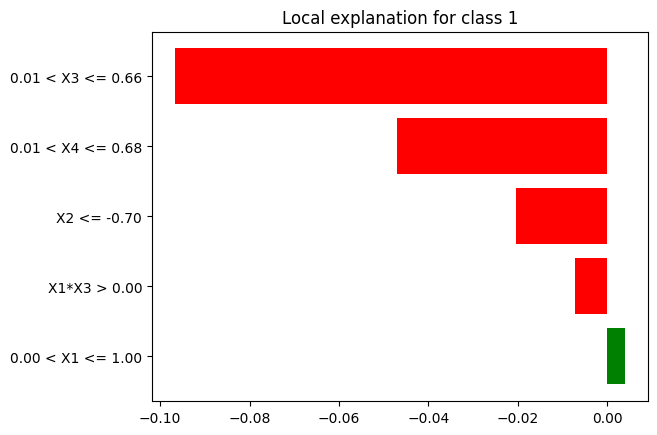

In [43]:
import lime
import lime.lime_tabular
import numpy as np

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[str(cls) for cls in np.unique(y_train)],
    mode='classification'
)

i = 0  # Index of the instance in the test set
instance = X_test.iloc[i]

exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True, show_all=False)
exp.as_pyplot_figure()
plt.show()

Finally we can save our model if needed

In [ ]:
import joblib
joblib.dump(model, 'xgboost_model.pkl')